## Prediction using Supervised ML

● Predict the percentage of marks of an student based on the number of study hours

● This is a simple linear regression task as it involves just 2 variables.

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_path="http://bit.ly/w-data"
data=pd.read_csv(data_path)
data.head()                         

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Analysis of the data

In [3]:
data.info()                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.isnull().sum()                 # for checking null values 

Hours     0
Scores    0
dtype: int64

In [5]:
data.describe()                    

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Since the data is very small it contain only two variable with no missing values. Hence it is easy to visualize it using scatter plot.

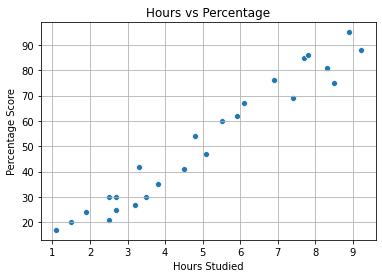

In [6]:
sns.scatterplot(x='Hours',y='Scores',data=data)
plt.title('Hours vs Percentage')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

In [7]:
#From the above graph we observe that as the number of hours of studies increases the probability to score good marks increses.
#There is positive relation between Hours studies vs Percentage Score. 

[]

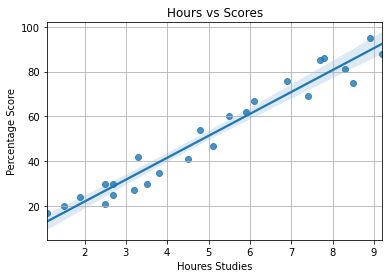

In [8]:
sns.regplot(x='Hours',y='Scores',data=data)
plt.title("Hours vs Scores")
plt.xlabel("Houres Studies")
plt.ylabel("Percentage Score")
plt.grid()
plt.plot()

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <a list of 10 Patch objects>)

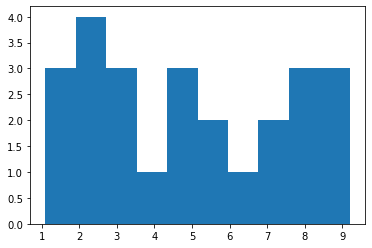

In [9]:
plt.hist(data['Hours'])

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

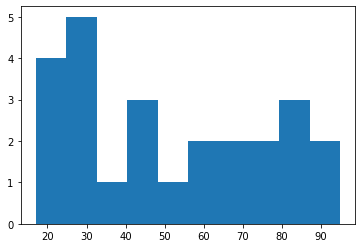

In [10]:
plt.hist(data['Scores'])

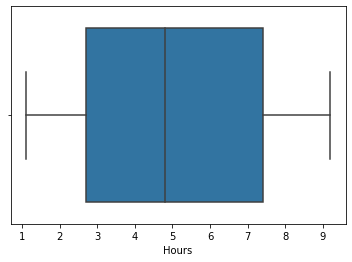

In [11]:
sns.boxplot(x='Hours',data=data)

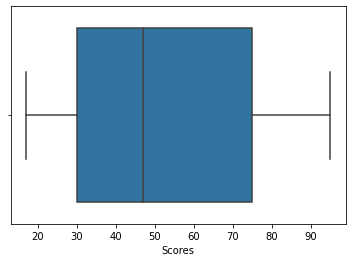

In [12]:
sns.boxplot(x='Scores',data=data)

## Preparing the Data

#### We divide the data into "Attributes"(input) and "labels" (output)

In [13]:
x=data[['Hours']].values
y=data[['Scores']].values

After obtaning the attribute and labels, Now we split the data into training and testing data using scikit learn library on 80%-20% basis.

In [17]:
# Importing the required function and spliting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# Training the model
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [20]:
# obtaining the intercept and coefficient of liner model

inter = regression.intercept_
coeff = regression.coef_
print("The intercept is : ",inter)
print(" THe cofficient is :",coeff[0])

The intercept is :  [4.2882518]
 THe cofficient is : [9.46256098]


## Making Prediction from the Model

In [21]:
y_prediction = regression.predict(x_test)

Now we can visualize the model prediction (best fit line) on our training and testing data.

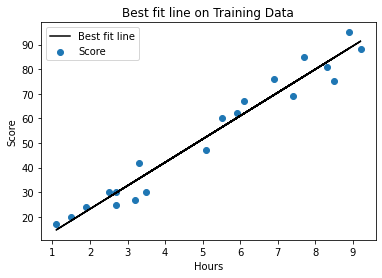

In [22]:
# visualizing the predictions with respect to our data for training data

plt.scatter(x_train,y_train, label="Score")
plt.plot(x_train, regression.predict(x_train),color='black', label='Best fit line')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Best fit line on Training Data")
plt.legend()
plt.show()

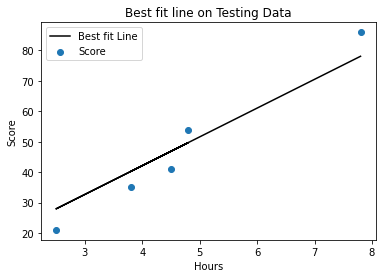

In [23]:
# for testing data

plt.scatter(x_test,y_test, label="Score")
plt.plot(x_test, regression.predict(x_test),color='black', label='Best fit Line')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Best fit line on Testing Data")
plt.legend()
plt.show()

## Making predictions

In [24]:
print("No of Hours = ",9.25)
print("Predicted Score in % = ",regression.predict([[9.25]])[0][0])

No of Hours =  9.25
Predicted Score in % =  91.81694087769424


In [25]:
from sklearn import metrics
print("Mean Absolute Error :",metrics.mean_absolute_error(y_test,y_prediction))
print("Mean Squared Error :",metrics.mean_squared_error(y_test,y_prediction))
print("Root mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

Mean Absolute Error : 6.051128406656952
Mean Squared Error : 38.2178098757245
Root mean Squared Error: 6.182055473361954
